In [13]:
%load_ext autoreload

%autoreload 2
import sys
%matplotlib inline
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

#sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/')
#import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%load_ext autoreload
%autoreload 2
import getdist
from getdist import plots, MCSamples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
err_noSSC = []
fit_noSSC = []
samples_noSSC = []
err_SSC = []
samples_SSC = []
names = ['1', '2','3',]
labels =  [r'\Omega_m', r'\sigma_8', r'n_s', ]

# Plot 1

In [6]:
settings={'mult_bias_correction_order':0,'smooth_scale_2D':8, 'smooth_scale_1D':8, 'boundary_correction_order':1}
settings={'mult_bias_correction_order':1,'smooth_scale_2D':9, 'smooth_scale_1D':9, 'boundary_correction_order':1}

noSSClowmass = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/noSSC_low-mass.npy')
samplenoSSClowmass = MCSamples(samples=noSSClowmass[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$low-mass\ (no\ SSC)$')
Omlowmass, s8lowmass, nslowmass = np.mean(noSSClowmass[9000:], axis=0)
errOmlowmass, errs8lowmass, errnslowmass = np.std(noSSClowmass[9000:], axis=0)
#######################
noSSClowredshift = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/noSSC_low-redshift.npy')
samplenoSSClowredshift = MCSamples(samples=noSSClowredshift[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$low-redshift\ (no\ SSC)$')
Omlowredshift, s8lowredshift, nslowredshift = np.mean(noSSClowredshift[9000:], axis=0)
errOmlowredshift, errs8lowredshift, errnslowredshift = np.std(noSSClowredshift[9000:], axis=0)
#######################

SSClowmass = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/SSC_low-mass.npy')
sampleSSClowmass = MCSamples(samples=SSClowmass[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$low-mass\ (SSC)$')

OmlowmassSSC, s8lowmassSSC, nslowmassSSC = np.mean(SSClowmass[9000:], axis=0)
errOmlowmassSSC, errs8lowmassSSC, errnslowmassSSC = np.std(SSClowmass[9000:], axis=0)
#######################
SSClowredshift = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/SSC_low-redshift.npy')
sampleSSClowredshift = MCSamples(samples=SSClowredshift[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$low-redshift\ (SSC)$')

OmlowredshiftSSC, s8lowredshiftSSC, nslowredshiftSSC = np.mean(SSClowredshift[9000:], axis=0)
errOmlowredshiftSSC, errs8lowredshiftSSC, errnslowredshiftSSC = np.std(SSClowredshift[9000:], axis=0)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [7]:
samplesnoSSC = [noSSClowmass,noSSClowredshift,]

In [8]:
g = plots.get_subplot_plotter(subplot_size=4)
#plt.style.use('dark_background')
range_ = {'1':[0.26, .33], '2':[0.81,.85], '3':[0.9,1]}
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 20
g.settings.axes_fontsize = 30
g.triangle_plot([ samplenoSSClowredshift, samplenoSSClowmass,sampleSSClowredshift, sampleSSClowmass,  ],
 filled=[False, False, True, True,],
                contour_colors = ['g', 'm', 'g', 'm',],
                contour_ls=['--', '--', '-', '-'],
                contour_lws=[2,2, 1, 1],
                param_limits = range_,
                marker_args = {'linewidth':30}, markers={'1':0.30711, '2':.8288, '3':0.96})
#g.triangle_plot(samples_SSC[1], filled=False, contour_colors = [colors(i) for i in range(len(samples))], contour_ls='--',
#                contour_lws=2,
#                       fine_bins = 1,  marker_args = {'linewidth':2}, markers={'1':0.30711, '2':.8288})
#plt.savefig('unbinned_noSSC_vs_SSC1.png', dpi = 300)

# Plot 2

In [9]:
settings={'mult_bias_correction_order':1,'smooth_scale_2D':9, 'smooth_scale_1D':9, 'boundary_correction_order':5}
noSSChighmass = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/noSSC_high-mass.npy')
samplenoSSChighmass = MCSamples(samples=noSSChighmass[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$high-mass\ (no\ SSC)$')
Omhighmass, s8highmass, nshighmass = np.mean(noSSChighmass[9000:],axis=0)
errOmhighmass, errs8highmass, errnshighmass = np.std(noSSChighmass[9000:],axis=0)
#print(np.mean(noSSChighmass[9000:],axis=0))

SSChighmass = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/SSC_high-mass.npy')
sampleSSChighmass = MCSamples(samples=SSChighmass[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$high-mass\ (SSC)$')
OmhighmassSSC, s8highmassSSC, nshighmassSSC = np.mean(SSChighmass[9000:],axis=0)
errOmhighmassSSC, errs8highmassSSC, errnshighmassSSC = np.std(SSChighmass[9000:],axis=0)
#print(np.mean(SSChighmass[9000:],axis=0))

noSSCfull = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/noSSC_full.npy')
samplenoSSCfull = MCSamples(samples=noSSCfull[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$full\ (no\ SSC)$')
Omfull, s8full, nsfull = np.mean(noSSCfull[9000:],axis=0)
errOmfull, errs8full, errnsfull = np.std(noSSCfull[9000:],axis=0)

SSCfull = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/manuscript/SSC_full.npy')
sampleSSCfull = MCSamples(samples=SSCfull[9000:],
names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$full\ (SSC)$')
OmfullSSC, s8fullSSC, nsfullSSC = np.mean(SSCfull[9000:],axis=0)
errfullOmSSC, errs8fullSSC, errnsfullSSC = np.std(SSCfull[9000:],axis=0)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [10]:
samplesnoSSC = [noSSClowmass, noSSChighmass,noSSClowredshift,noSSCfull]
samplesSSC = [SSClowmass, SSChighmass,SSClowredshift,SSCfull]

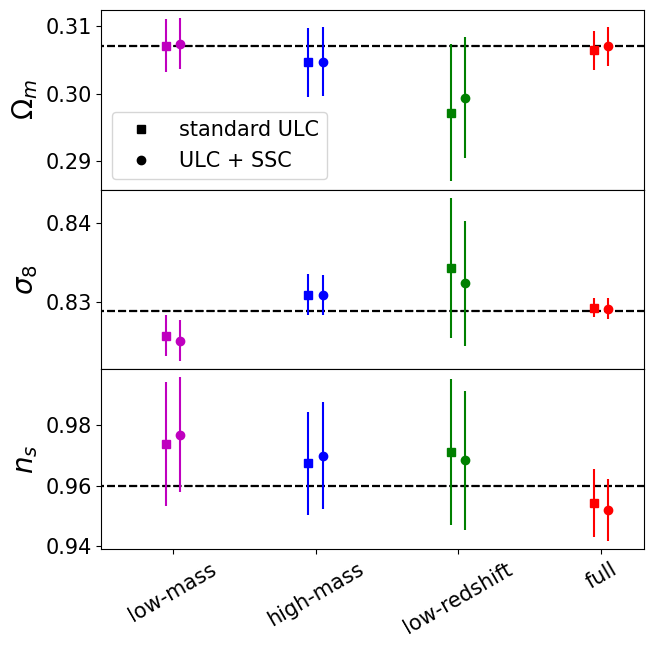

In [18]:
fig, ax = plt.subplots(3,1,figsize=(7, 7),sharey=False, sharex = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
color = ['m','b','g','r']
for i in range(3):
    ax[i].tick_params(axis='both', which = 'major', labelsize= 15)
    ax[0].set_xlim(-.5, 3.3)
    ax[i].set_xticks([0,1,2,3])
    ax[0].set_ylabel(r'$\Omega_m$', fontsize=20)
    ax[1].set_ylabel(r'$\sigma_8$', fontsize=20)
    ax[2].set_ylabel(r'$n_s$', fontsize=20)
    x = np.linspace(-1,4, 100)
    ax[0].plot(x, 0*x+ 0.30711, '--k', zorder=0)
    ax[1].plot(x, 0*x+ 0.8288, '--k', zorder=0)
    ax[2].plot(x, 0*x+ 0.96, '--k', zorder=0)
for i, names in enumerate(['low-mass', 'high-mass','low-redshift','full']):
    OmSSC, s8SSC, nsSSC = np.mean(samplesSSC[i][9000:],axis=0)
    errOmSSC, errs8SSC, errnsSSC = np.std(samplesSSC[i][9000:],axis=0)
    
    OmnoSSC, s8noSSC, nsnoSSC = np.mean(samplesnoSSC[i][9000:],axis=0)
    errOmnoSSC, errs8noSSC, errnsnoSSC = np.std(samplesnoSSC[i][9000:],axis=0)
    #
    ax[0].errorbar(i+.05,OmSSC,errOmSSC, marker='o', color = color[i])
    ax[0].errorbar(i - .05,OmnoSSC,errOmnoSSC, marker='s', color = color[i])
    #
    ax[1].errorbar(i+.05,s8SSC,errs8SSC, marker='o', color = color[i])
    ax[1].errorbar(i - .05,s8noSSC,errs8noSSC, marker='s', color = color[i])
    #
    ax[2].errorbar(i+.05,nsSSC,errnsSSC, marker='o', color = color[i])
    ax[2].errorbar(i - .05,nsnoSSC,errnsnoSSC, marker='s', color = color[i])
    
ax[0].plot([], [], 'sk', label = r'standard ULC')
ax[0].plot([], [], 'ok', label = r'ULC + SSC')
ax[0].legend(loc = 'lower left', fontsize=15)
    
ax[2].set_xticklabels(['low-mass', 'high-mass','low-redshift','full'], fontsize=15, rotation=30)

plt.savefig('unbinned_noSSC_vs_SSC_fits.png', dpi=300,bbox_inches='tight', )

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(7, 7),sharey=False, sharex = True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=.1)
for i in range(3):
    ax[i].tick_params(axis='both', which = 'major', labelsize= 15)
    ax[0].set_xlim(-.5, 3.3)
    ax[i].set_xticks([0,1,2,3])
    ax[0].set_ylabel(r'$\sigma_{\rm SSC}(\Omega_m)/\sigma_{\rm std}(\Omega_m)$', fontsize=12)
    ax[1].set_ylabel(r'$\sigma_{\rm SSC}(\sigma_8)/\sigma_{\rm std}(\sigma_8)$', fontsize=12)
    ax[2].set_ylabel(r'$\sigma_{\rm SSC}(n_s)/\sigma_{\rm std}(n_s)$', fontsize=12)
    x = np.linspace(-1,4, 100)
    ax[0].plot(x, 0*x+ 1, '--k', zorder=0)
    ax[1].plot(x, 0*x+ 1, '--k', zorder=0)
    ax[2].plot(x, 0*x+ 1, '--k', zorder=0)
for i, names in enumerate(['low-mass', 'high-mass','low-redshift','full']):
    OmSSC, s8SSC, nsSSC = np.mean(samplesSSC[i][9500:],axis=0)
    errOmSSC, errs8SSC, errnsSSC = np.std(samplesSSC[i][9500:],axis=0)
    
    OmnoSSC, s8noSSC, nsnoSSC = np.mean(samplesnoSSC[i][9500:],axis=0)
    errOmnoSSC, errs8noSSC, errnsnoSSC = np.std(samplesnoSSC[i][9500:],axis=0)
    #
    ax[0].errorbar(i,errOmSSC/errOmnoSSC, marker='s', color = color[i])
    #
    ax[1].errorbar(i,errs8SSC/errs8noSSC, marker='s', color =  color[i])
   
    #
    ax[2].errorbar(i,errnsSSC/errnsnoSSC, marker='s', color = color[i])

ax[2].set_xticklabels(['low-mass', 'high-mass','low-redshift','full'], fontsize=15, rotation=30)
#plt.savefig('unbinned_noSSC_vs_SSC_fits_2.png', dpi = 300)

In [ ]:
plt.plot(noSSCfull[:,0])

In [ ]:
100*(1-np.array([errOmfull, errs8full, errnsfull])/np.array([errfullOmSSC, errs8fullSSC, errnsfullSSC]))

In [ ]:
np.array([errOmlowmass, errs8lowmass, errnslowmass])

In [ ]:
np.array([Omlowredshift, errs8lowredshift, errnslowredshift])

In [ ]:
0.29-0.30

In [ ]:
0.01/0.3

In [ ]:
np.array([errOmlowredshift, errs8lowredshift, errnslowredshift])/np.array([errOmfull, errs8full, errnsfull])

In [ ]:
100*(1-np.array([errOmlowredshift, errs8lowredshift, errnslowredshift])/np.array([errOmlowredshiftSSC, errs8lowredshiftSSC, errnslowredshiftSSC]))

# SSC

In [ ]:
import matplotlib.pylab as pl
colors = plt.cm.get_cmap('plasma', 5)
c = [colors(i) for i in range(5)]
#[samplenoSSCfull, sampleSSCfull, samplenoSSCsmall, sampleSSCsmall]

In [ ]:
g = plots.get_subplot_plotter(subplot_size=4)
#plt.style.use('dark_background')
range_ = {'1':[0.26, .33], '2':[0.81,.85], '3':[0.9,1]}
g.settings.legend_fontsize = 20
g.settings.figure_legend_ncol = 2

g.triangle_plot([  samplenoSSChighmass,samplenoSSCfull, sampleSSChighmass,sampleSSCfull, ],
                filled=[False, False, True, True,],
                contour_colors = ['g', 'm', 'g', 'm',],
                contour_ls=['--', '--', '-', '-'],
                contour_lws=[2,2, 1, 1],
                param_limits = range_,
                contour_levels=3,
                marker_args = {'linewidth':30}, markers={'1':0.30711, '2':.8288, '3':0.96})
#g.triangle_plot(samples_SSC[1], filled=False, contour_colors = [colors(i) for i in range(len(samples))], contour_ls='--',
#                contour_lws=2,
#                       fine_bins = 1,  marker_args = {'linewidth':2}, markers={'1':0.30711, '2':.8288})
#plt.savefig('unbinned_noSSC_vs_SSC_2.png', dpi = 300)

In [ ]:
g = plots.get_subplot_plotter(subplot_size=4)
g.settings.figure_legend_ncol = 2
g.settings.lab_fontsize = 30
g.settings.legend_fontsize = 25
g.settings.axes_fontsize = 20
g.settings.axis_marker_lw =1.5
g.settings.figure_legend_loc = 'lower center'
range_ = {'1':[0.27, .33], '2':[0.81,.85], '3':[0.9,1]}
g.triangle_plot([ samplenoSSClowredshift, samplenoSSClowmass,sampleSSClowredshift, sampleSSClowmass,  ] ,
                upper_roots = [samplenoSSChighmass,samplenoSSCfull, sampleSSChighmass,sampleSSCfull,],
                upper_kwargs = {'contour_colors':['b', 'r', 'b', 'r',],'contour_ls':['--', '--', '-', '-'], 'contour_lws':[1.5,1.5,1, 1] }, 
                filled=[False, False, True, True,] ,
                contour_colors = ['g', 'm', 'g', 'm',],
                contour_ls=['--', '--', '-', '-'],
                contour_lws=[1.5,1.5, 1, 1],
                param_limits = range_,
                contour_levels=3,
                marker_args = {'linewidth':30, 'ls':'-'}, markers={'1':0.30711, '2':.8288, '3':0.96});
plt.savefig('unbinned_noSSC_vs_SSC.png', dpi = 300,bbox_inches='tight')